# Crypto Prediction

Question
1. how to handle missing value?

# TODO

In [ ]:
# impute non zero y
# tune ICA

#Notes

1. This is a regression / prediction problem

In [ ]:
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)

In [ ]:
# # # # Load the Drive helper and mount
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#!unzip "/content/drive/My Drive/crypto_prediction/data.zip" -d "/content"

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from google.colab import files

In [ ]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')

In [ ]:
# check data shapes
train.shape, test.shape, ss.shape

((12632, 49), (6222, 48), (6222, 2))

In [ ]:
# Preview train
train.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.007118,1.0,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.009419,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.013530,1.0,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,424.0,268.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.010332,1.0,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [ ]:
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,56.0,2.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,213.0,51.0,274.0,6046.0,3034.0,23453171.0,119.0,2305.0,1367.0,6252.0,151.0,565.0,603.0,4553.0,174.0,2900568.0,1898920.0,2268741.0,14056214.0,2338771.0,23465365.0,3.7,39.0,3.2,3.4,2.8,65.5,0.004407,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,72.0,30.0,112.0,2404.0,304.0,3831278.0,12.0,346.0,73.0,604.0,39.0,103.0,668.0,1406.0,188.0,29147.0,411178.0,873284.0,2389256.0,129448.0,3832828.0,3.7,2.0,3.0,3.0,3.4,65.5,0.024035,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,96.0,217.0,244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,49.0,33.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


In [ ]:
ss.head()

,id,close
0,ID_323Sn2,0
1,ID_325SNW,0
2,ID_325uzE,0
3,ID_328qCx,0
4,ID_3293uJ,0


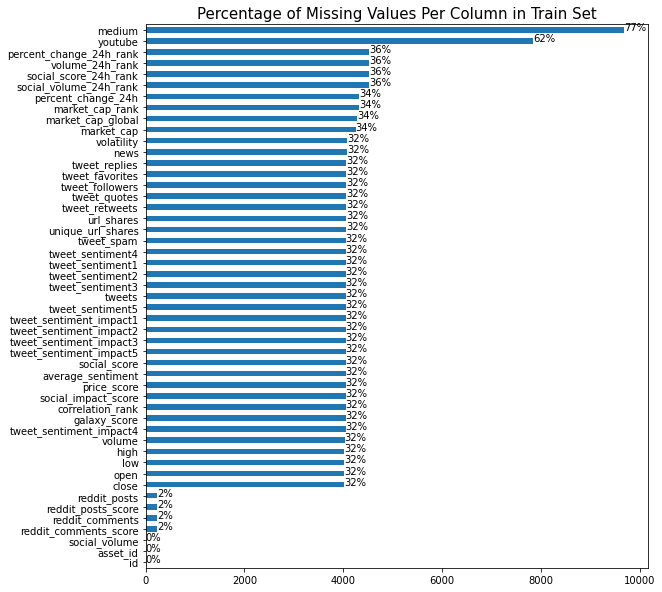

In [ ]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

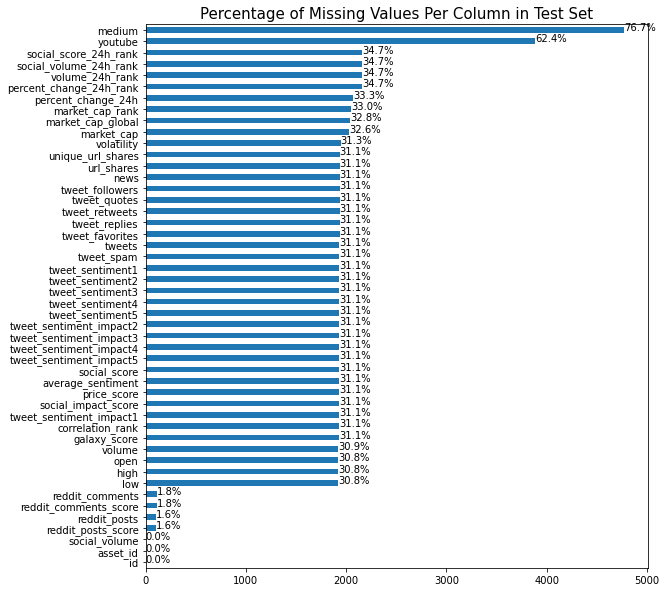

In [ ]:
# Check if there missing values in test set
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
# fill missing values
train = train.fillna(0)
test = test.fillna(0)

In [ ]:
train.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.007118,1.0,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.009419,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.013530,1.0,692.0,3.0,1.0,1.0,0.0,0.0,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,17.0,424.0,268.0,443.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285,0.000000,0.000000e+00,0.000000
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.010332,1.0,749.0,2.0,1.0,1.0,0.0,2.0,3996,2.609576,3.386925e+11,10384.798216


In [ ]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

In [ ]:
SEED = 23
# Select main columns to be used in training
main_cols = train.columns.difference(['id', 'close','medium','asset_id', 'social_volume_24h_rank', 'volume_24h_rank', 'market_cap_rank', 'social_score_24h_rank', 'tweet_followers']) # assert_id exclude since all 1, volatility, 'youtube', 

X = train[main_cols]
y = train.close.astype(float)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42)

# Final

In [ ]:
from sklearn.model_selection import RepeatedKFold

from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge


from sklearn.model_selection import cross_val_score
from numpy import mean, std


In [ ]:
# y_cleaned = y_train[y_train != 0]
# y_cleaned.index
# X_cleaned = X_train[X_train.index.isin(list(y_cleaned.index))]
# print(X_cleaned.shape)
# print(y_cleaned.shape)
# y_test_cleaned = y_test[y_test != 0]
# X_test_cleaned = X_test[X_test.index.isin(list(y_test_cleaned.index))]
# print(X_test_cleaned.shape)
# print(y_test_cleaned.shape)

(7774, 45)
(7774,)
(843, 45)
(843,)


In [ ]:
# used on X_train instead of X_delete as above

from sklearn.ensemble import IsolationForest

iso = IsolationForest(random_state=SEED, contamination=0.1)
y_pred = iso.fit_predict(X_train)
X_train_cleaned = X_train[np.where(y_pred == 1, True, False)]
y_train_cleaned = y_train[np.where(y_pred == 1, True, False)]

# summarize the shape of the updated training dataset
print(X_train_cleaned.shape, y_train_cleaned.shape)
cleaned,_ = X_train_cleaned.shape

total, _ = X_train.shape
print("number of outlier row removed: ", total - cleaned)
print("percentage of outliers removed: ", (total-cleaned) / total)

(11254, 45) (11254,)
number of outlier row removed:  114
percentage of outliers removed:  0.010028149190710767


In [ ]:
#submission
ridge_rg = Ridge(alpha=1, solver="auto", random_state=SEED)

#ridge_rg.fit(X_train_cleaned, y_train_cleaned) # 81

ridge_rg.fit(X_train, y_train) # 77

y_pred = ridge_rg.predict(X_test)

#ridge_rg.fit(X_delete_cleaned, y_delete_cleaned) # 81
#ridge_rg.fit(X_reduced, y_delete)x # 81
#y_pred = ridge_rg.predict(X_test_reduced)

#y_pred = ridge_rg.predict(X_test_imputed)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test, squared=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.94201e-28): result may not be accurate.
  overwrite_a=True).T


55.8501606006677

In [ ]:
# evaluate the model

ridge_rg = Ridge(alpha=1, solver="auto", random_state=SEED)

cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=SEED)
#n_scores = cross_val_score(ridge_rg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(ext, X_cleaned, y_cleaned, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

print('RMSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) # ['id', 'close', 'asset_id'] -> RMSE: -61.251 (11.243)

RMSE: -67.142 (13.430)


In [ ]:
# evaluate the model

ext = ExtraTreesRegressor(random_state=SEED, n_estimators=130, max_depth=39, min_samples_split=2)  # 39->RMSE: -56.458 (8.914)


cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=SEED)
n_scores = cross_val_score(ext, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
#n_scores = cross_val_score(ext, X_cleaned, y_cleaned, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

print('RMSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) # ['id', 'close', 'asset_id'] -> RMSE: -61.251 (11.243)

RMSE: -56.201 (8.062)


In [ ]:
def fit_model(model, X_given=X_train, y_given=y_train, X_test_given=X_test):
    # # Fit Model
    model.fit(X_given, y_given)
    # Predict
    y_pred = model.predict(X_test_given)
    from sklearn.metrics import mean_squared_error
    print(mean_squared_error(y_pred, y_test, squared=False))

In [ ]:

from sklearn.ensemble import ExtraTreesRegressor

ext = ExtraTreesRegressor(random_state=SEED, n_estimators=130, max_depth=39, min_samples_split=2)  

fit_model(ext, X_train, y_train, X_test)# 59.632469543757274

#fit_model(ext, X_cleaned, y_cleaned, X_test)
#fit_model(ext, X_delete, y_delete)
# 83
#fit_model(ext, X_train_scaled, y_train, X_test_scaled) #worse
#fit_model(ext, X_train_imp_mean, y_train, X_test_imp_mean) 137.67830689850263
#fit_model(ext, X_reduced, y_train, X_test_reduced)

59.632469543757274


ValueError: ignored

## Pre-processing

## delete

In [ ]:
print(len(X_train))
n_zeros_allow =39  #(X_train.shape[1])//6, 41, 39(77)
#print("number of half columns",n_zeros_th)

X_delete = X_train[X_train.eq(0).sum(1) < n_zeros_allow] #X_train[(X_train != 0).all(1)]
print(len(X_delete))
X_delete.head()
y_delete = y_train[y_train.index.isin(list(X_delete.index))]

1263
864


## isoforest

### x_delete

In [ ]:
# # used on X_train instead of X_delete as above

# from sklearn.ensemble import IsolationForest
# from sklearn.metrics import make_scorer, f1_score
# from sklearn import model_selection
# from sklearn.datasets import make_classification

# iso = IsolationForest(random_state=SEED, contamination=0.1)
# y_pred = iso.fit_predict(X_delete)
# X_delete_cleaned = X_delete[np.where(y_pred == 1, True, False)]
# y_delete_cleaned = y_delete[np.where(y_pred == 1, True, False)]

# # summarize the shape of the updated training dataset
# print(X_delete_cleaned.shape, y_delete_cleaned.shape)
# cleaned,_ = X_delete_cleaned.shape

# total, _ = X_delete.shape
# print("number of outlier row removed: ", total - cleaned)
# print("percentage of outliers removed: ", (total-cleaned) / total)

NameError: ignored

### x_train

In [ ]:
# used on X_train instead of X_delete as above

from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.datasets import make_classification

iso = IsolationForest(random_state=SEED, contamination=0.05)
y_pred = iso.fit_predict(X_train)
X_train_cleaned = X_train[np.where(y_pred == 1, True, False)]
y_train_cleaned = y_train[np.where(y_pred == 1, True, False)]

# summarize the shape of the updated training dataset
print(X_train_cleaned.shape, y_train_cleaned.shape)
cleaned,_ = X_train_cleaned.shape

total, _ = X_train.shape
print("number of outlier row removed: ", total - cleaned)
print("percentage of outliers removed: ", (total-cleaned) / total)

(10799, 80) (10799,)
number of outlier row removed:  569
percentage of outliers removed:  0.05005277973258269


## standardised (bad)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_delete_scaled = scaler.transform(X_delete)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

## robust scaler (bad result)

In [ ]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X_delete)
X_delete_robust = transformer.transform(X_delete)

transformer = RobustScaler().fit(X_test)
X_test_robust = transformer.transform(X_test)

## remove nans,zeros trial

remove rows contain half nan

In [ ]:
# np.random.seed([SEED])
# df = pd.DataFrame(np.random.choice([1, np.nan], size=(5, 10)))

# df

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0
1,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0
2,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
3,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN
4,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN


In [ ]:
df.shape

(5, 10)

In [ ]:
# n_not_empty = 6 #df.shape[1]/2
# print(th)
# df.dropna(thresh = n_not_empty, axis = 0, inplace = True)
# df



6


,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0
1,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0


remove rows contain half zeros

In [ ]:
# np.random.seed([SEED])
# df = pd.DataFrame(np.random.choice([1, 0], size=(5, 10)))

# df

,0,1,2,3,4,5,6,7,8,9
0,1,1,0,0,1,1,1,1,0,1
1,0,1,1,1,1,1,0,1,0,1
2,1,1,0,1,1,0,1,0,0,0
3,1,1,0,0,1,0,1,0,1,0
4,0,0,0,1,1,0,1,1,1,0


In [ ]:
# df.eq(0).sum(axis=1)

0    3
1    3
2    5
3    5
4    5
dtype: int64

In [ ]:
# n_zeros =(df.shape[1])//2
# print(n_zeros)
# df[df.eq(0).sum(1) < n_zeros]

5


,0,1,2,3,4,5,6,7,8,9
0,1,1,0,0,1,1,1,1,0,1
1,0,1,1,1,1,1,0,1,0,1


remove rows that contain at least one zero's

In [ ]:
print(len(X_train))
X_delete = X_train[(X_train != 0).all(1)]
print(len(X_delete))
X_delete.head()
y_delete = y_train[y_train.index.isin(list(X_delete.index))]

10105
5724


## remove half zeros

In [ ]:
# print(len(X_train))
# n_zeros_allow = 42  #(X_train.shape[1])//6
# #print("number of half columns",n_zeros_th)

# X_delete = X_train[X_train.eq(0).sum(1) < n_zeros_allow] #X_train[(X_train != 0).all(1)]
# print(len(X_delete))
# X_delete.head()
# y_delete = y_train[y_train.index.isin(list(X_delete.index))]

10105
9703


## iso forest on X_delete

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.datasets import make_classification

iso = IsolationForest(random_state=SEED)
y_pred = iso.fit_predict(X_delete)
X_delete_cleaned = X_delete[np.where(y_pred == 1, True, False)]
y_delete_cleaned = y_delete[np.where(y_pred == 1, True, False)]

# summarize the shape of the updated training dataset
print(X_delete_cleaned.shape, y_delete_cleaned.shape)
cleaned,_ = X_delete_cleaned.shape

total, _ = X_delete.shape
print("number of outlier row removed: ", total - cleaned)
print("percentage of outliers removed: ", (total-cleaned) / total)

(6300, 45) (6300,)
number of outlier row removed:  631
percentage of outliers removed:  0.0910402539316116


In [ ]:
# from sklearn.cluster import DBSCAN, not working

# db = DBSCAN(eps=0.0001, min_samples=100).fit(X_delete)
# X_delete_cleaned = X_delete[db.labels_ != -1]
# y_delete_cleaned = y_delete[db.labels_ != -1]

# # summarize the shape of the updated training dataset
# print(X_delete_cleaned.shape, y_delete_cleaned.shape)
# cleaned,_ = X_delete_cleaned.shape

# total, _ = X_delete.shape
# print("number of outlier row removed: ", total - cleaned)
# print("percentage of outliers removed: ", (total-cleaned) / total)

(0, 45) (0,)
number of outlier row removed:  6931
percentage of outliers removed:  1.0


In [ ]:
# from sklearn.ensemble import IsolationForest
# from sklearn.metrics import make_scorer, f1_score
# from sklearn import model_selection
# from sklearn.datasets import make_classification

# iso = IsolationForest(random_state=SEED, contamination=0.1)
# y_pred = iso.fit_predict(X_train)
# X_train_cleaned = X_train[np.where(y_pred == 1, True, False)]
# y_train_cleaned = y_train[np.where(y_pred == 1, True, False)]

# # summarize the shape of the updated training dataset
# print(X_train_cleaned.shape, y_train_cleaned.shape)
# cleaned,_ = X_train_cleaned.shape

# total, _ = X_train.shape
# print("number of outlier row removed: ", total - cleaned)
# print("percentage of outliers removed: ", (total-cleaned) / total)

(9094, 45) (9094,)
number of outlier row removed:  1011
percentage of outliers removed:  0.10004948045522019


## imputation

### univariate (bad result)

In [ ]:
from sklearn.impute import SimpleImputer
X_imp_median = SimpleImputer(missing_values=0, strategy='median')
X_imp_median = X_imp_median.fit_transform(X_train)

import pandas as pd
X_imp_median = pd.DataFrame(X_imp_median, columns = list(X_train.columns))

# dont impute row contain zero, thes outlier should be learnt to predict the missing value as in the final test set
X_cleaned_zero = X_train[X_train.index.isin(list(y_train[y_train.close ==0].index))]

cols = list(X_cleaned_zero.columns)
X_imp_median.loc[X_imp_median.index.isin(X_cleaned_zero.index), cols] = X_cleaned_zero[cols] # replace row from one dataframe to another

In [ ]:
from sklearn.impute import SimpleImputer
X_test_imp_median = SimpleImputer(missing_values=0, strategy='median')
X_test_imp_median = X_test_imp_median.fit_transform(X_test)

import pandas as pd
X_test_imp_median = pd.DataFrame(X_test_imp_median, columns = list(X_test.columns))

X_test_cleaned_zero = X_test[X_test.index.isin(list(y_test[y_test==0].index))]

cols = list(X_test_cleaned_zero.columns)
X_test_imp_median.loc[X_test_imp_median.index.isin(X_test_cleaned_zero.index), cols] = X_test_cleaned_zero[cols] # replace row from one dataframe to another

In [ ]:
#len(list(y_test[y_test==0].index))

421

In [ ]:
# # zeros
# y_cleaned_zero = y_train[y_train.close.astype(int) == 0]
# X_cleaned_zero = X_train[X_train.index.isin(list(y_cleaned_zero.index))]

# print(X_train.shape)
# print(y_train.shape)
# print()
# print(X_cleaned_zero.shape)
# print(y_cleaned_zero.shape)

In [ ]:
# #(y_train==0).sum()
# # y_train[y_train.close == 0]
# X_cleaned_zero

In [ ]:
(X_imp_mean==0).astype(int).sum().sort_values()/len(X_imp_mean)*100

social_volume               0.000000
reddit_comments             1.653765
reddit_posts                1.803308
reddit_comments_score       1.944053
reddit_posts_score          1.979240
news                       31.069669
average_sentiment          31.615060
tweet_sentiment3           31.615060
tweet_sentiment4           31.615060
tweet_sentiment5           31.615060
tweet_sentiment_impact1    31.615060
tweet_sentiment_impact2    31.615060
tweet_sentiment_impact3    31.615060
tweet_sentiment_impact4    31.615060
tweet_sentiment_impact5    31.615060
tweet_spam                 31.615060
tweets                     31.615060
unique_url_shares          31.615060
url_shares                 31.615060
volatility                 31.615060
tweet_sentiment2           31.615060
tweet_sentiment1           31.615060
tweet_favorites            31.615060
tweet_replies              31.615060
correlation_rank           31.615060
galaxy_score               31.615060
high                       31.615060
l

In [ ]:
 (X_train==0).astype(int).sum().sort_values()/len(X_train)*100

social_volume               0.000000
reddit_comments             1.812104
reddit_posts                1.970443
reddit_comments_score       2.102393
reddit_posts_score          2.172766
high                       31.615060
low                        31.615060
open                       31.615060
volume                     31.720619
tweet_sentiment4           31.870162
tweet_sentiment5           31.870162
tweet_sentiment_impact2    31.870162
tweet_sentiment_impact3    31.870162
tweet_sentiment_impact4    31.870162
social_impact_score        31.870162
average_sentiment          31.870162
price_score                31.870162
tweet_sentiment_impact5    31.870162
tweet_spam                 31.870162
tweets                     31.870162
galaxy_score               31.870162
correlation_rank           31.870162
tweet_sentiment2           31.870162
tweet_sentiment3           31.870162
unique_url_shares          31.940535
url_shares                 31.940535
tweet_favorites            31.958128
t

In [ ]:
(X_test_imp_median==0).astype(int).sum().sort_values()/len(X_test_imp_median)*100

social_volume              0.000000
reddit_posts               0.079114
reddit_posts_score         0.158228
reddit_comments            0.395570
reddit_comments_score      0.474684
average_sentiment          3.243671
tweet_sentiment2           3.243671
tweet_sentiment3           3.243671
tweet_sentiment4           3.243671
tweet_sentiment5           3.243671
tweet_sentiment_impact1    3.243671
tweet_sentiment_impact2    3.243671
tweet_sentiment_impact3    3.243671
tweet_sentiment_impact4    3.243671
tweet_sentiment_impact5    3.243671
tweet_spam                 3.243671
tweets                     3.243671
unique_url_shares          3.243671
url_shares                 3.243671
volatility                 3.243671
tweet_sentiment1           3.243671
tweet_retweets             3.243671
tweet_favorites            3.243671
tweet_quotes               3.243671
correlation_rank           3.243671
galaxy_score               3.243671
high                       3.243671
low                        3

In [ ]:
(X_test==0).astype(int).sum().sort_values()/len(X_test)*100

social_volume               0.000000
reddit_posts                1.344937
reddit_comments             1.898734
reddit_posts_score          1.977848
reddit_comments_score       2.136076
high                       33.306962
low                        33.306962
open                       33.306962
volume                     33.306962
average_sentiment          33.623418
tweet_sentiment2           33.623418
tweet_sentiment3           33.623418
tweet_sentiment5           33.623418
tweet_sentiment_impact2    33.623418
tweet_sentiment_impact3    33.623418
tweet_sentiment_impact4    33.623418
tweet_sentiment_impact5    33.623418
tweet_spam                 33.623418
tweets                     33.623418
tweet_sentiment4           33.623418
tweet_retweets             33.623418
tweet_favorites            33.623418
social_impact_score        33.623418
price_score                33.623418
correlation_rank           33.623418
galaxy_score               33.623418
tweet_quotes               33.702532
s

### multivariate 

#### convert numpy to pandas

In [ ]:
# no zeros
y_cleaned = y_train[y_train != 0]
y_cleaned.index
X_cleaned = X_train[X_train.index.isin(list(y_cleaned.index))]
print(X_cleaned.shape)
print(y_cleaned.shape)

y_test_cleaned = y_test[y_test != 0]
X_test_cleaned = X_test[X_test.index.isin(list(y_test_cleaned.index))]
print(X_test_cleaned.shape)
print(y_test_cleaned.shape)

(7774, 40)
(7774,)
(843, 40)
(843,)


In [ ]:
# zeros
y_cleaned_zero = y_train[y_train == 0]
X_cleaned_zero = X_train[X_train.index.isin(list(y_cleaned_zero.index))]
print(X_cleaned_zero.shape)
print(y_cleaned_zero.shape)

(3594, 40)
(3594,)


In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=SEED, missing_values=0) # here the missing value is instead 0 since we fill nan with zeros beforehand

X_imputed = imp_mean.fit_transform(X_cleaned)

import pandas as pd
X_imputed = pd.DataFrame(X_imputed, columns = list(X_cleaned.columns))

In [ ]:
X_new = X_imputed.append(X_cleaned_zero, ignore_index=True)

In [ ]:
X_new.head()

,average_sentiment,correlation_rank,galaxy_score,high,low,market_cap,market_cap_global,news,open,percent_change_24h,percent_change_24h_rank,price_score,reddit_comments,reddit_comments_score,reddit_posts,reddit_posts_score,social_impact_score,social_score,social_volume,tweet_favorites,tweet_quotes,tweet_replies,tweet_retweets,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,tweet_spam,tweets,unique_url_shares,url_shares,volatility,volume,youtube
0,3.6,2.6,68.0,18318.452773,18303.958107,3.395272e+11,5.449273e+11,18.000000,18318.452773,-4.559145,1076.0,3.2,67.0,156.0,51.0,172.0,4.2,14111388.0,5408.0,2417.0,41.0,243.0,521.0,62.0,572.0,611.0,3198.0,89.0,125248.0,2618138.0,3011192.0,8098383.0,256430.0,1563.0,4532.0,740.0,1669.0,0.016692,9.944220e+08,2.0
1,3.7,4.7,77.5,7550.592958,7538.033373,1.379543e+11,2.171955e+11,36.000000,7550.592958,5.901404,477.0,3.1,68.0,265.0,58.0,192.0,4.0,20964482.0,5818.0,3868.0,84.0,437.0,1409.0,155.0,154.0,928.0,3229.0,244.0,443382.0,412029.0,3674794.0,16057947.0,374229.0,595.0,4710.0,946.0,1644.0,0.025393,1.401598e+09,5.0
2,3.7,3.3,70.0,9123.040273,9115.024817,1.673726e+11,2.669533e+11,25.000000,9119.815677,-0.093935,1096.0,2.8,39.0,60.0,26.0,113.0,4.2,12238225.0,3905.0,2203.0,18.0,1155.0,2012.0,73.0,282.0,326.0,2409.0,95.0,174656.0,1547011.0,633933.0,9617342.0,264188.0,1298.0,3185.0,630.0,922.0,0.005119,6.270151e+08,1.0
3,3.6,2.5,70.5,6315.471122,6309.281509,1.166195e+11,1.766512e+11,0.053464,6315.471122,-7.804890,1125.0,3.9,89.0,633.0,27.0,646.0,4.1,8026249.0,2913.0,2213.0,56.0,304.0,427.0,64.0,169.0,451.0,1597.0,133.0,124026.0,748828.0,1227341.0,5769267.0,155603.0,212.0,2414.0,383.0,530.0,0.016701,1.389393e+09,1.0
4,3.6,4.5,76.0,46787.898272,46250.250495,8.654892e+11,1.396854e+12,27.000000,46557.829521,21.242381,285.0,3.4,236.0,528.0,104.0,554.0,3.7,217887100.0,21873.0,29993.0,502.0,1913.0,7738.0,390.0,2574.0,1411.0,15475.0,499.0,21279720.0,8320581.0,7831069.0,170831811.0,9620719.0,3313.0,20349.0,1157.0,2118.0,0.074106,3.519595e+09,3.0


In [ ]:
X_train.head()

,average_sentiment,correlation_rank,galaxy_score,high,low,market_cap,market_cap_global,news,open,percent_change_24h,percent_change_24h_rank,price_score,reddit_comments,reddit_comments_score,reddit_posts,reddit_posts_score,social_impact_score,social_score,social_volume,tweet_favorites,tweet_quotes,tweet_replies,tweet_retweets,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,tweet_spam,tweets,unique_url_shares,url_shares,volatility,volume,youtube
5350,3.6,2.6,68.0,18318.452773,18303.958107,3.395272e+11,5.449273e+11,18.0,18318.452773,-4.559145,1076.0,3.2,67.0,156.0,51.0,172.0,4.2,14111388.0,5408,2417.0,41.0,243.0,521.0,62.0,572.0,611.0,3198.0,89.0,125248.0,2618138.0,3011192.0,8098383.0,256430.0,1563.0,4532.0,740.0,1669.0,0.016692,9.944220e+08,2.0
2582,3.7,4.7,77.5,7550.592958,7538.033373,1.379543e+11,2.171955e+11,36.0,7550.592958,5.901404,477.0,3.1,68.0,265.0,58.0,192.0,4.0,20964482.0,5818,3868.0,84.0,437.0,1409.0,155.0,154.0,928.0,3229.0,244.0,443382.0,412029.0,3674794.0,16057947.0,374229.0,595.0,4710.0,946.0,1644.0,0.025393,1.401598e+09,5.0
8857,3.7,3.3,70.0,9123.040273,9115.024817,1.673726e+11,2.669533e+11,25.0,9119.815677,-0.093935,1096.0,2.8,39.0,60.0,26.0,113.0,4.2,12238225.0,3905,2203.0,18.0,1155.0,2012.0,73.0,282.0,326.0,2409.0,95.0,174656.0,1547011.0,633933.0,9617342.0,264188.0,1298.0,3185.0,630.0,922.0,0.005119,6.270151e+08,1.0
11178,3.6,2.5,70.5,6315.471122,6309.281509,1.166195e+11,1.766512e+11,0.0,6315.471122,-7.804890,1125.0,3.9,89.0,633.0,27.0,646.0,4.1,8026249.0,2913,2213.0,56.0,304.0,427.0,64.0,169.0,451.0,1597.0,133.0,124026.0,748828.0,1227341.0,5769267.0,155603.0,212.0,2414.0,383.0,530.0,0.016701,1.389393e+09,1.0
10337,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.0,0.0,122.0,200.0,10.0,26.0,0.0,0.0,132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0


In [ ]:
X_imputed.head()

,average_sentiment,correlation_rank,galaxy_score,high,low,market_cap,market_cap_global,news,open,percent_change_24h,percent_change_24h_rank,price_score,reddit_comments,reddit_comments_score,reddit_posts,reddit_posts_score,social_impact_score,social_score,social_volume,tweet_favorites,tweet_quotes,tweet_replies,tweet_retweets,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,tweet_spam,tweets,unique_url_shares,url_shares,volatility,volume,youtube
0,3.6,2.6,68.0,18318.452773,18303.958107,3.395272e+11,5.449273e+11,18.000000,18318.452773,-4.559145,1076.0,3.2,67.0,156.0,51.0,172.0,4.2,14111388.0,5408.0,2417.0,41.0,243.0,521.0,62.0,572.0,611.0,3198.0,89.0,125248.0,2618138.0,3011192.0,8098383.0,256430.0,1563.0,4532.0,740.0,1669.0,0.016692,9.944220e+08,2.0
1,3.7,4.7,77.5,7550.592958,7538.033373,1.379543e+11,2.171955e+11,36.000000,7550.592958,5.901404,477.0,3.1,68.0,265.0,58.0,192.0,4.0,20964482.0,5818.0,3868.0,84.0,437.0,1409.0,155.0,154.0,928.0,3229.0,244.0,443382.0,412029.0,3674794.0,16057947.0,374229.0,595.0,4710.0,946.0,1644.0,0.025393,1.401598e+09,5.0
2,3.7,3.3,70.0,9123.040273,9115.024817,1.673726e+11,2.669533e+11,25.000000,9119.815677,-0.093935,1096.0,2.8,39.0,60.0,26.0,113.0,4.2,12238225.0,3905.0,2203.0,18.0,1155.0,2012.0,73.0,282.0,326.0,2409.0,95.0,174656.0,1547011.0,633933.0,9617342.0,264188.0,1298.0,3185.0,630.0,922.0,0.005119,6.270151e+08,1.0
3,3.6,2.5,70.5,6315.471122,6309.281509,1.166195e+11,1.766512e+11,0.053464,6315.471122,-7.804890,1125.0,3.9,89.0,633.0,27.0,646.0,4.1,8026249.0,2913.0,2213.0,56.0,304.0,427.0,64.0,169.0,451.0,1597.0,133.0,124026.0,748828.0,1227341.0,5769267.0,155603.0,212.0,2414.0,383.0,530.0,0.016701,1.389393e+09,1.0
4,3.6,4.5,76.0,46787.898272,46250.250495,8.654892e+11,1.396854e+12,27.000000,46557.829521,21.242381,285.0,3.4,236.0,528.0,104.0,554.0,3.7,217887100.0,21873.0,29993.0,502.0,1913.0,7738.0,390.0,2574.0,1411.0,15475.0,499.0,21279720.0,8320581.0,7831069.0,170831811.0,9620719.0,3313.0,20349.0,1157.0,2118.0,0.074106,3.519595e+09,3.0


In [ ]:
# print(len(X_train))
# X_no_zeros = X_train[(X_train != 0).all(1)]
# print(len(X_no_zeros))
# X_no_zeros.head()
# y_no_zeros = y_train[y_train.index.isin(list(X_no_zeros.index))]

10105
5684


In [ ]:
# import numpy as np
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# imp_mean = IterativeImputer(random_state=SEED, missing_values=0, max_iter=100) # here the missing value is instead 0 since we fill nan with zeros beforehand

# X_imputed = imp_mean.fit_transform(X_delete)

# import pandas as pd
# X_imputed = pd.DataFrame(X_imputed, columns = list(X_delete.columns))

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [ ]:
#impute on x_delete
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=SEED, missing_values=0, sample_posterior=True) # here the missing value is instead 0 since we fill nan with zeros beforehand

X_delete_imputed = imp_mean.fit_transform(X_delete)

import pandas as pd
X_delete_imputed = pd.DataFrame(X_delete_imputed, columns = list(X_delete.columns))

In [ ]:
X_train.head()

In [ ]:
X_imputed.head()

In [ ]:
a = X_delete.describe().loc[['std']]
b = a[a<=1]
b.dropna(axis=1) # drop column contains nan

,average_sentiment,correlation_rank,market_cap_rank,price_score,social_impact_score,social_score_24h_rank,social_volume_24h_rank,volatility,volume_24h_rank
std,0.401672,0.802339,0.209366,0.847917,0.696761,0.260664,0.283554,0.019206,0.673301


In [ ]:
X_train.describe()

In [ ]:
X_imputed.describe()

In [ ]:
# Check if there missing values in test set
ax = X_imputed.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

### Knn imputer (bad result)

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights="uniform", missing_values=0)
X_imp_knn = imputer.fit_transform(X_delete)

## Log transform

In [ ]:
# convert all 0 to 1
X_delete_one = X_delete.replace(0, 1)

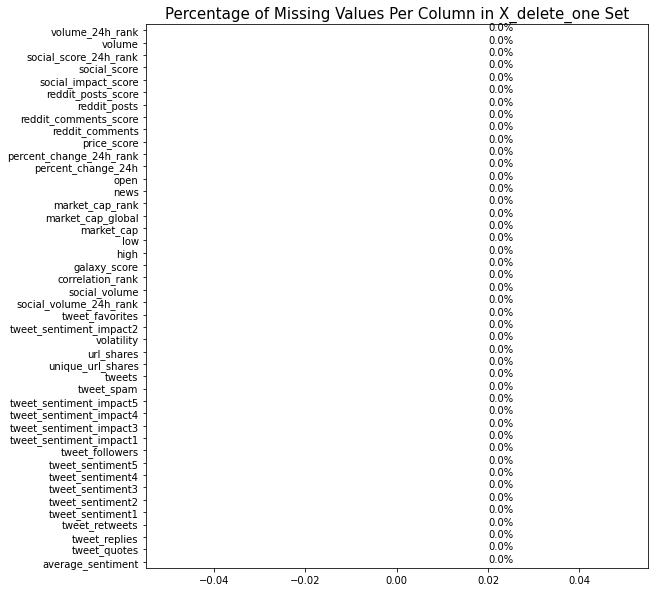

In [ ]:
# Check if there missing values in test set
ax = X_delete_one.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in X_delete_one Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/X_delete_one.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
for c in [c for c in X_delete_one.columns if c != 'percent_change_24h']:
    X_delete_one[c] = np.log(X_delete_one[c])

In [ ]:
X_delete_one.describe()

,average_sentiment,correlation_rank,galaxy_score,high,low,market_cap,market_cap_global,market_cap_rank,news,open,percent_change_24h,percent_change_24h_rank,price_score,reddit_comments,reddit_comments_score,reddit_posts,reddit_posts_score,social_impact_score,social_score,social_score_24h_rank,social_volume,social_volume_24h_rank,tweet_favorites,tweet_followers,tweet_quotes,tweet_replies,tweet_retweets,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,tweet_spam,tweets,unique_url_shares,url_shares,volatility,volume,volume_24h_rank
count,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000
mean,1.280709,1.145662,4.167462,9.335157,9.330090,25.168684,25.533135,0.000559,2.644729,9.332712,0.431318,6.213838,1.041845,4.115471,5.454444,3.596214,5.197910,1.275563,16.317229,0.004300,8.406353,0.012101,7.898097,16.349220,4.198457,5.836456,6.738478,4.166058,5.470390,6.280362,7.768856,5.078200,11.657594,13.838555,14.259675,15.944999,13.154737,6.661996,8.145969,6.469824,6.935324,-4.382385,20.557646,0.690247
std,0.141042,0.271429,0.460143,1.016547,1.015093,4.906869,5.190712,0.025902,1.377057,1.015821,3.595194,1.670587,0.333589,0.685528,0.865470,0.750048,1.087598,0.226548,2.131915,0.054430,0.739843,0.090788,1.377573,2.017651,1.224211,1.210479,1.179748,1.700216,1.140454,0.866613,1.063662,1.011610,4.170520,1.949880,1.704596,1.872859,1.984680,1.236635,1.085524,0.856175,0.935113,0.890956,2.056944,0.259346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-44.690403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.708050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.450457,0.000000,0.000000
25%,1.280934,1.029619,4.158883,9.031338,9.027570,25.712651,26.122971,0.000000,2.079442,9.029454,-1.161925,6.410175,0.993252,3.688879,4.897840,3.178054,4.521789,1.098612,16.027247,0.000000,8.078688,0.000000,7.289269,16.026966,3.465736,5.257495,6.228511,4.143135,4.948760,5.948035,7.424165,4.744932,11.877902,13.143772,13.928833,15.629707,12.519603,5.811141,7.851467,6.316261,6.738152,-4.951654,20.227576,0.693147
50%,1.308333,1.163151,4.219508,9.176753,9.171937,25.882394,26.317560,0.000000,3.178054,9.174331,0.364590,6.682109,1.098612,4.043051,5.416100,3.663562,5.147494,1.335001,16.459489,0.000000,8.392990,0.000000,7.906915,16.457579,4.234107,5.899897,6.771936,4.624973,5.525453,6.318968,7.786552,5.204007,12.701908,13.912596,14.339061,16.060438,13.185646,6.677083,8.186743,6.551080,7.016610,-4.476917,20.700272,0.693147
75%,1.308333,1.308333,4.276666,9.479518,9.476228,26.106928,26.647678,0.000000,3.610918,9.478626,1.777816,6.863803,1.193922,4.465908,6.017375,4.094345,5.855072,1.410987,16.943192,0.000000,8.744010,0.000000,8.581481,16.939164,4.993822,6.552508,7.324160,5.010635,6.167516,6.693324,8.194644,5.669881,13.566923,14.756853,14.787368,16.502479,13.919945,7.603399,8.561975,6.794587,7.318540,-3.959629,21.194629,0.693147
max,1.410987,1.609438,4.471639,11.026912,11.019828,27.762843,28.352522,1.791759,5.823046,11.025311,31.076357,7.306531,1.609438,7.195187,12.227002,6.214608,10.327415,1.609438,20.250456,0.693147,11.852472,0.693147,13.358406,20.249970,9.954656,10.542258,11.740746,8.213924,8.945984,9.216223,11.822452,8.551208,17.880073,18.477319,

In [ ]:
np.log(20)

2.995732273553991

# feature selection

## FeatureAgglomeration

In [ ]:
import numpy as np
from sklearn import datasets, cluster

agglo = cluster.FeatureAgglomeration(affinity="euclidean", linkage="average", pooling_func=np.median, n_clusters=44) # , n_clusters=361)
agglo.fit(X_delete)

X_reduced = agglo.transform(X_delete)
X_reduced.shape

(6931, 44)

In [ ]:
import numpy as np
from sklearn import datasets, cluster

agglo = cluster.FeatureAgglomeration(affinity="euclidean", linkage="average", pooling_func=np.median, n_clusters=44) # , n_clusters=361)
agglo.fit(X_test)

X_test_reduced = agglo.transform(X_test)
X_test_reduced.shape

(2527, 44)

In [ ]:
 'feature_preprocessor:feature_agglomeration:affinity': 'euclidean', 'feature_preprocessor:feature_agglomeration:linkage': 'average', 'feature_preprocessor:feature_agglomeration:n_clusters': 361, 'feature_preprocessor:feature_agglomeration:pooling_func': 'median', 

#PCA

Text(0, 0.5, 'cumulative explained variance')

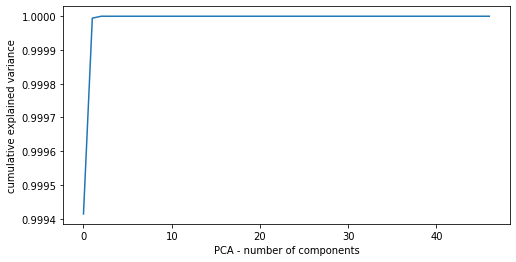

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('PCA - number of components')
plt.ylabel('cumulative explained variance')

##performance compare using PCA

In [ ]:
for n_features in range(15,46,2):
    print("# features", n_features, end=" ")
    pca = PCA(n_components=n_features)
    pca.fit(X_train)
    X_pca = pca.transform(X_train)
    ridge_rg(X_pca)

# features 15 

NameError: ignored

In [ ]:
for n_features in range(1,46,2):
    print("# features", n_features, end=" ")
    pca = PCA(n_components=n_features)
    pca.fit(X_train)
    X_pca = pca.transform(X_train)
    #ext_rg(X_pca)
    ext_rg(X_pca)

In [ ]:
# for n_features in range(15,46,5):
#     print("# features", n_features, end=" ")
#     pca = PCA(n_components=n_features)
#     pca.fit(X_train)
#     X_pca = pca.transform(X_train)
#     X_pca_test = pca.transform(X_test)
#     #submission
#     ext_model = ExtraTreeRegressor(random_state=SEED, max_depth=21, splitter="best")

#     #ext_model.fit(X_train_cleaned, y_train_cleaned)
#     ext_model.fit(X_pca, y_train)

#     y_pred = ext_model.predict(X_pca_test)

#     from sklearn.metrics import mean_squared_error
#     a = mean_squared_error(y_pred, y_test, squared=False)
#     print(a)

# features 15 168.14742867151642
# features 20 189.1521141726684
# features 25 187.66648479503453
# features 30 184.77552379677832
# features 35 195.20320081495618
# features 40 191.40486048761647
# features 45 195.37489487992585


#Baseline score

In [ ]:
# Load libraries

from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score # scoring - https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from sklearn import metrics

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#TabNet

In [ ]:
#!pip install pytorch-tabnet

In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor
import torch.nn as nn
import torch

#criterion = torch.nn.MSELoss()
criterion = nn.L1Loss()

# class RMSELoss(nn.Module):
#     def __init__(self, eps=1e-8):
#         super().__init__()
#         self.mse = nn.MSELoss()
#         self.eps = eps
        
#     def forward(self,yhat,y):
#         loss = torch.sqrt(self.mse(yhat,y) + self.eps)
#         return loss

# criterion = RMSELoss()

clf = TabNetRegressor(
    optimizer_fn=torch.optim.SGD,
    optimizer_params=dict(lr=9e-1, momentum=0.9, weight_decay=5e-4, nesterov =True), # 7 -> 250
    scheduler_params={"patience":10, "factor":0.7}, # 5, 0.7
    #n_steps=3,
    lambda_sparse=1e-4,
    scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau, mask_type='entmax' 
    #scheduler_fn=torch.optim.lr_scheduler.StepLR, mask_type='entmax' # StepLR
)  

# scheduler_params={"step_size":10, # how to use learning rate scheduler
#                     "gamma":0.7},

# y_train_net = y_delete.values.reshape(-1, 1)
# X_train_net = X_delete.values

y_train_net = y_delete.values.reshape(-1, 1)
X_train_net = X_scaled

# y_train_net = y_train.values.reshape(-1, 1)
# X_train_net = X_train.values

clf.fit(
  X_train_net, y_train_net,
  eval_set=[(X_train_net, y_train_net)],
  eval_metric=['rmse'],
  max_epochs=2000,
  batch_size=1024*2, virtual_batch_size=128,
  drop_last=False,
  patience=500,
  loss_fn=criterion
)

Device used : cuda
epoch 0  | loss: 15383.74796| val_0_rmse: 20871.8557|  0:00:00s
epoch 1  | loss: 15377.08634| val_0_rmse: 20853.42957|  0:00:00s
epoch 2  | loss: 15332.95692| val_0_rmse: 20727.96772|  0:00:01s
epoch 3  | loss: 15104.7989| val_0_rmse: 20272.3371|  0:00:01s
epoch 4  | loss: 14302.26489| val_0_rmse: 19000.18078|  0:00:01s
epoch 5  | loss: 12433.65079| val_0_rmse: 17297.30771|  0:00:01s
epoch 6  | loss: 9342.0368| val_0_rmse: 16835.30316|  0:00:02s
epoch 7  | loss: 7351.87619| val_0_rmse: 15392.02197|  0:00:02s
epoch 8  | loss: 7476.71652| val_0_rmse: 10772.26357|  0:00:03s
epoch 9  | loss: 6751.04557| val_0_rmse: 11512.46126|  0:00:03s
epoch 10 | loss: 5494.20289| val_0_rmse: 9879.65493|  0:00:03s
epoch 11 | loss: 4667.32959| val_0_rmse: 10297.51952|  0:00:04s
epoch 12 | loss: 4523.28553| val_0_rmse: 8872.59179|  0:00:04s
epoch 13 | loss: 3862.51647| val_0_rmse: 9890.17355|  0:00:04s
epoch 14 | loss: 3232.31004| val_0_rmse: 6278.20827|  0:00:05s
epoch 15 | loss: 2680.8

KeyboardInterrupt: ignored

In [ ]:
clf

TabNetRegressor(n_d=8, n_a=8, n_steps=3, gamma=1.3, cat_idxs=[], cat_dims=[], cat_emb_dim=1, n_independent=2, n_shared=2, epsilon=1e-15, momentum=0.02, lambda_sparse=0.0001, seed=0, clip_value=1, verbose=1, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.07}, scheduler_fn=<class 'torch.optim.lr_scheduler.ReduceLROnPlateau'>, scheduler_params={'patience': 5, 'factor': 0.5}, mask_type='entmax', input_dim=44, output_dim=1, device_name='auto')

In [ ]:
# save tabnet model
saving_path_name = "./tabnet_model_test_1"
saved_filepath = clf.save_model(saving_path_name)

# define new model with basic parameters and load state dict weights
loaded_clf = TabNetRegressor(
    optimizer_params=dict(lr=7e-2), # 7 -> 250
    scheduler_params={"patience":5, "factor":0.5}, # 0.7
    #n_steps=3,
    lambda_sparse=1e-4,
    scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau, mask_type='entmax' 
    #scheduler_fn=torch.optim.lr_scheduler.StepLR, mask_type='entmax' # StepLR
)  

loaded_clf.load_model(saved_filepath)

In [ ]:
preds = clf.predict(X_test.values)

from sklearn.metrics import mean_squared_error
mean_squared_error(preds, y_test.values, squared=False)

252.5939150788076

In [ ]:
# from pytorch_tabnet.pretraining import TabNetPretrainer
# from pytorch_tabnet.tab_model import TabNetRegressor
# import torch

# unsupervised_model = TabNetPretrainer(
#     optimizer_fn=torch.optim.Adam,
   
#     mask_type='entmax', # "sparsemax",
    
    
# )

# unsupervised_model.fit(
#     X_train=X_train_net,
#     eval_set=[X_train_net],
#     pretraining_ratio=0.8,
#     drop_last=False,
#     batch_size=2048, virtual_batch_size=128,
# )

# clf = TabNetRegressor()  

# clf.fit(
#   X_train_net, y_train_net,
#   eval_set=[(X_train_net, y_train_net)],
#   eval_metric=['rmse'],
#   from_unsupervised=unsupervised_model,
#    max_epochs=2000
# )

In [ ]:
unsupervised_model.predict(X_test.values)

RuntimeError: ignored

In [ ]:
preds = clf.predict(X_test)


#Model selection

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge

from sklearn.model_selection import cross_val_score
from numpy import mean, std


##GradientBoostingRegressor

In [ ]:
# evaluate the model
model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
print('RMSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) # RMSE: -89.512 (8.465)

RMSE: -89.512 (8.465)


##*ExtraTreeRegressor*

### iso

In [ ]:
# used on X_train instead of X_delete as above

from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.datasets import make_classification

iso = IsolationForest(random_state=SEED, contamination=0.1)
y_pred = iso.fit_predict(X_train)
X_train_cleaned = X_train[np.where(y_pred == 1, True, False)]
y_train_cleaned = y_train[np.where(y_pred == 1, True, False)]

# summarize the shape of the updated training dataset
print(X_train_cleaned.shape, y_train_cleaned.shape)
cleaned,_ = X_train_cleaned.shape

total, _ = X_train.shape
print("number of outlier row removed: ", total - cleaned)
print("percentage of outliers removed: ", (total-cleaned) / total)

(9094, 45) (9094,)
number of outlier row removed:  1011
percentage of outliers removed:  0.10004948045522019


In [ ]:
# # used on X_train instead of X_delete as above

# from sklearn.ensemble import IsolationForest
# from sklearn.metrics import make_scorer, f1_score
# from sklearn import model_selection
# from sklearn.datasets import make_classification

# iso = IsolationForest(random_state=SEED, contamination=0.3)
# y_pred = iso.fit_predict(X_imputed)
# X_imputed_cleaned = X_imputed[np.where(y_pred == 1, True, False)]
# y_imputed_cleaned = y_train[np.where(y_pred == 1, True, False)]

# # summarize the shape of the updated training dataset
# print(X_imputed_cleaned.shape, y_imputed_cleaned.shape)
# cleaned,_ = X_imputed_cleaned.shape

# total, _ = X_imputed.shape
# print("number of outlier row removed: ", total - cleaned)
# print("percentage of outliers removed: ", (total-cleaned) / total)

### evaluate the model

In [ ]:
def ext_rg(X_given,y_given=y_train):
  model = ExtraTreeRegressor(random_state=SEED, max_depth=21, splitter="best") #ExtraTreeRegressor(random_state=SEED, max_depth=26)
  #model = ExtraTreeRegressor(random_state=SEED, criterion="friedman_mse", max_depth=None, max_features=0.7929825166874074, max_leaf_nodes=None, min_impurity_decrease=0, min_samples_leaf=2, min_samples_split=6, min_weight_fraction_leaf=0)
  #model = SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'feature_agglomeration', 'regressor:__choice__': 'extra_trees', 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.013555629780288401, 'feature_preprocessor:feature_agglomeration:affinity': 'euclidean', 'feature_preprocessor:feature_agglomeration:linkage': 'average', 'feature_preprocessor:feature_agglomeration:n_clusters': 361, 'feature_preprocessor:feature_agglomeration:pooling_func': 'median', 'regressor:extra_trees:bootstrap': 'False', 'regressor:extra_trees:criterion': 'friedman_mse', 'regressor:extra_trees:max_depth': 'None', 'regressor:extra_trees:max_features': 0.7929825166874074, 'regressor:extra_trees:max_leaf_nodes': 'None', 'regressor:extra_trees:min_impurity_decrease': 0.0, 'regressor:extra_trees:min_samples_leaf': 2, 'regressor:extra_trees:min_samples_split': 6, 'regressor:extra_trees:min_weight_fraction_leaf': 0.0})
  
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
  n_scores = cross_val_score(model, X_given, y_given, scoring='neg_root_mean_squared_error', cv=cv)
  print('RMSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) # RMSE: -104.756 (33.902), X_train_cleaned -> RMSE: -39.699 (14.663)

#ext_rg(X_train) # current: RMSE: -82.658 (14.536), without youtube, medium columns -> RMSE: -80.446 (18.064)
#ext_rg(X_train_cleaned, y_train_cleaned)
ext_rg(X_delete, y_delete)
#ext_rg(X_imp_mean, y_delete)
#ext_rg(X_reduced, y_delete)

RMSE: -105.176 (20.966)


In [ ]:
'regressor:extra_trees:bootstrap': 'False', 'regressor:extra_trees:criterion': 'friedman_mse', 'regressor:extra_trees:max_depth': 'None', 'regressor:extra_trees:max_features': 0.7929825166874074, 'regressor:extra_trees:max_leaf_nodes': 'None', 'regressor:extra_trees:min_impurity_decrease': 0.0, 'regressor:extra_trees:min_samples_leaf': 2, 'regressor:extra_trees:min_samples_split': 6, 'regressor:extra_trees:min_weight_fraction_leaf': 0.0},

## submission

In [ ]:
#submission
ext_model = ExtraTreeRegressor(random_state=SEED, max_depth=21, splitter="best")

#ext_model.fit(X_train_cleaned, y_train_cleaned)
#ext_model.fit(X_train, y_train) # 103.01549008547863, 104.76005740251006 - remove highly missing cols

#ext_model.fit(X_no_zeros, y_no_zeros) worse
#ext_model.fit(X_imputed, y_train)

ext_model.fit(X_delete, y_delete) 
y_pred = ext_model.predict(X_test)

#ext_model.fit(X_scaled, y_delete) # zero mean worse
#y_pred = ext_model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test, squared=False)

3210.1832141707114

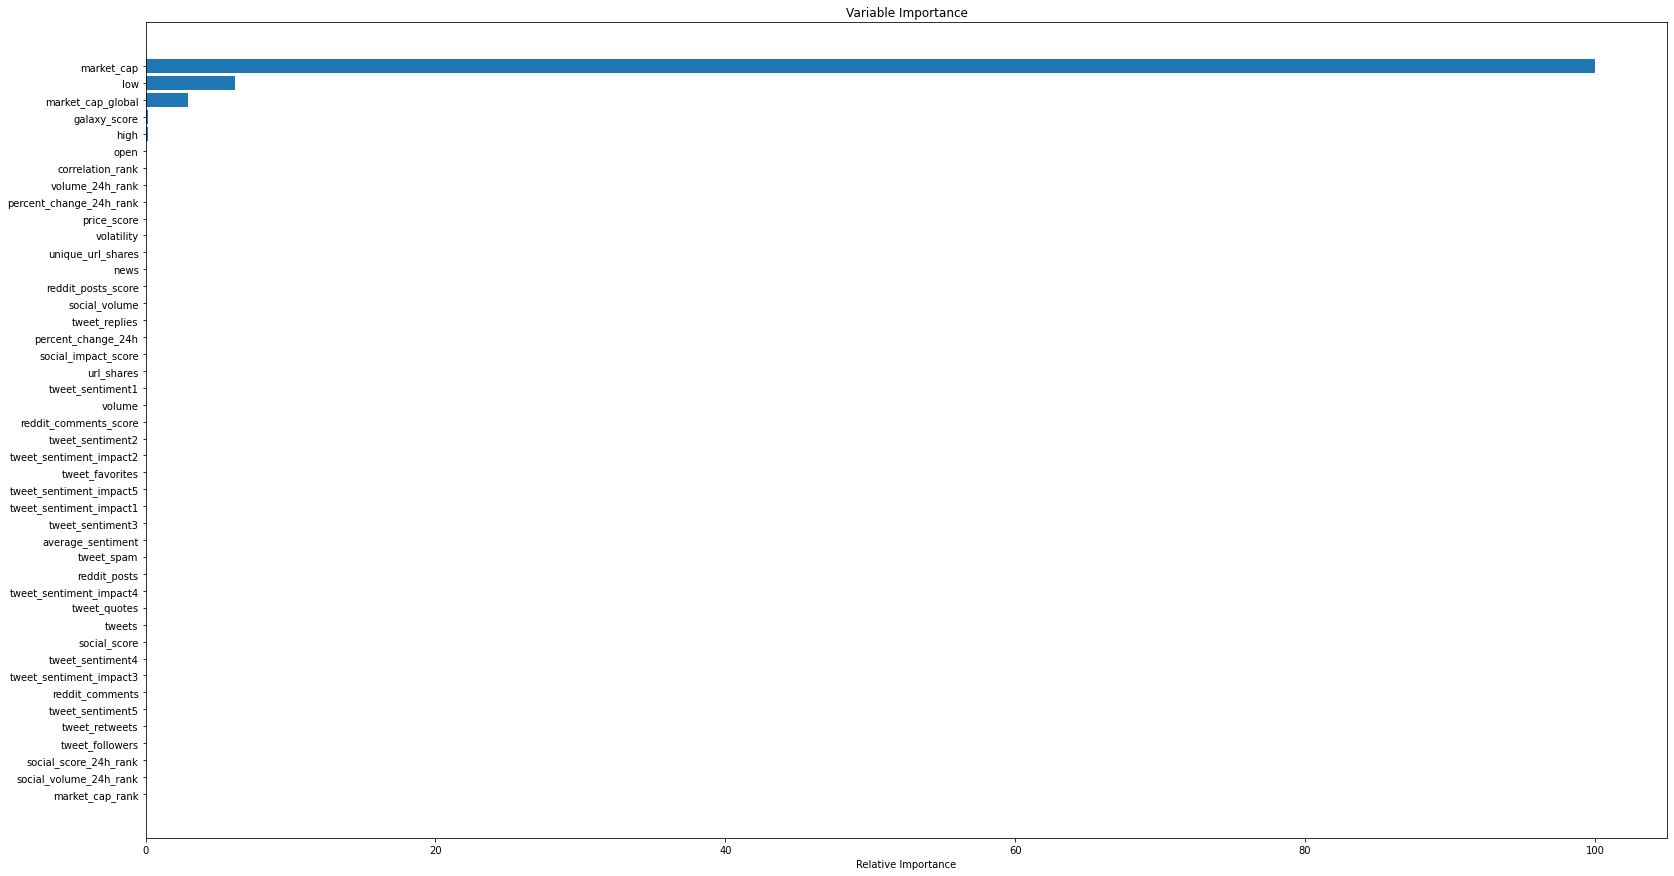

In [ ]:
clf = ExtraTreeRegressor(random_state=SEED)
clf.fit(X_delete, y_delete.values.ravel())

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + 1 # start from 1
plt.figure(figsize=(60,15))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_delete.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

##random tree

In [ ]:
# evaluate the model
model = RandomForestRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
#n_scores = cross_val_score(model, X_train_cleaned, y_train_cleaned, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
from numpy import mean, std
print('RMSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) # RMSE: -57.897 (6.050), x_trained_clean -> RMSE: -55.651 (21.680), X_delete -> -124.312 (30.900)

In [ ]:
#submission
rand_tree_model = RandomForestRegressor(random_state=SEED) # , max_depth=21

#rand_tree_model.fit(X_train_cleaned, y_train_cleaned)
#rand_tree_model.fit(X_train, y_train)
rand_tree_model.fit(X_delete, y_delete)

y_pred = rand_tree_model.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test, squared=False)

78.83659223649168

## bayeisan regressor

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, interaction_only=True)
X_poly = poly.fit_transform(X_train)

X_test_poly = poly.fit_transform(X_test)

In [ ]:
X_train.shape

(11368, 40)

In [ ]:
X_poly.shape

(11368, 3241)

## add features

In [ ]:
SEED = 23
# Select main columns to be used in training
main_cols = train.columns.difference(['id', 'close','medium','asset_id', 'social_volume_24h_rank', 'volume_24h_rank', 'market_cap_rank', 'social_score_24h_rank', 'tweet_followers']) # assert_id exclude since all 1, volatility, 'youtube', 
#main_cols = train.columns.difference(['id', 'close','medium','asset_id'])

X = train[main_cols]
y = train.close.astype(float)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=23)

X_train = X_train.reset_index().drop("index", 1)
y_train = y_train.reset_index().drop("index", 1)

In [ ]:
y_train.head()

,close
0,18305.759089
1,7538.033373
2,9123.040273
3,6309.281509
4,0.000000


In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection

N_COMP = 40  # 30 PCA - 53, ICA: 40 - 49.5, 35 - 50

print("\nStart decomposition process...")

print("ICA")
ica = FastICA(n_components=40, random_state=17)
ica_results_train = ica.fit_transform(X_train)
ica_results_test = ica.transform(X_test)


print("Append decomposition components to datasets...")
for i in range(1, 40 + 1):


    X_train['ica_' + str(i)] = ica_results_train[:, i - 1]
    X_test['ica_' + str(i)] = ica_results_test[:, i - 1]

   
print('\nTrain shape: {}\nTest shape: {}'.format(X_train.shape, X_test.shape))


Start decomposition process...
ICA
Append decomposition components to datasets...

Train shape: (11368, 80)
Test shape: (1264, 80)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# from sklearn.decomposition import PCA, TruncatedSVD, FastICA
# from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection

# N_COMP = 40  # 30 PCA - 53, ICA: 40 - 49.5, 35 - 50

# print("\nStart decomposition process...")
# # print("PCA")
# # pca = PCA(n_components=N_COMP, random_state=17)
# # pca_results_train = pca.fit_transform(X_train)
# # pca_results_test = pca.transform(X_test)
# # print(pca.explained_variance_ratio_)

# # print("tSVD")
# # tsvd = TruncatedSVD(n_components=N_COMP, random_state=17)
# # tsvd_results_train = tsvd.fit_transform(X_train)
# # tsvd_results_test = tsvd.transform(X_test)

# print("ICA")
# ica = FastICA(n_components=40, random_state=17)
# ica_results_train = ica.fit_transform(X_train)
# ica_results_test = ica.transform(X_test)

# # print("GRP") # to be reduced
# # grp = GaussianRandomProjection(n_components=N_COMP, eps=0.1, random_state=17)
# # grp_results_train = grp.fit_transform(X_train)
# # grp_results_test = grp.transform(X_test)

# # print("SRP")
# # srp = SparseRandomProjection(n_components=N_COMP, dense_output=True, random_state=17)
# # srp_results_train = srp.fit_transform(X_train)
# # srp_results_test = srp.transform(X_test)

# print("Append decomposition components to datasets...")
# for i in range(1, N_COMP + 1):
#     # X_train['pca_' + str(i)] = pca_results_train[:, i - 1]
#     # X_test['pca_' + str(i)] = pca_results_test[:, i - 1]
    
   
#     # X_train['tsvd_' + str(i)] = tsvd_results_train[:, i - 1]
#     # X_test['tsvd_' + str(i)] = tsvd_results_test[:, i - 1]

#     X_train['ica_' + str(i)] = ica_results_train[:, i - 1]
#     X_test['ica_' + str(i)] = ica_results_test[:, i - 1]


#     # X_train['grp_' + str(i)] = grp_results_train[:, i - 1]
#     # X_test['grp_' + str(i)] = grp_results_test[:, i - 1]

#     # X_train['srp_' + str(i)] = srp_results_train[:, i - 1]
#     # X_test['srp_' + str(i)] = srp_results_test[:, i - 1]

# print('\nTrain shape: {}\nTest shape: {}'.format(X_train.shape, X_test.shape))


Start decomposition process...
ICA
Append decomposition components to datasets...

Train shape: (11368, 80)
Test shape: (1264, 80)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# from sklearn import linear_model

# reg = linear_model.BayesianRidge(compute_score=True)
# #submission

# reg.fit(X_poly, y_train)

# y_pred = reg.predict(X_test_poly)

# from sklearn.metrics import mean_squared_error
# mean_squared_error(y_pred, y_test, squared=False)

230906.94924252375

In [ ]:
from sklearn import linear_model

reg = linear_model.BayesianRidge(compute_score=True)
#submission

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test, squared=False)

39721963.81229357

##kNN regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=20)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
n_scores = cross_val_score(neigh, X_train_cleaned, y_train_cleaned, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
from numpy import mean, std
print('RMSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) 

RMSE: -307.799 (65.892)


##xgboost

In [ ]:
#!pip install xgboost

In [ ]:
X_t = X_train[:-1000]
X_t.shape

(10368, 80)

In [ ]:
#submission
SEED = 104
model = XGBRegressor(objective='reg:squarederror', max_depth=16, n_estimators=150, #16
                     learning_rate= 0.0764, random_state=SEED, gamma=0, booster="gbtree", # , subsample=0.90,
                      tree_method='auto', # gpu_hist
                      subsample=1,
                      colsample_bytree=1,
                      reg_alpha=0.5, # 52.96502463981406:0.5 without those added columns
                      reg_lambda=1 
                     # min_child_weight, TODO
                     ) #54.14->0.0765
# cut_off = -1000
# X_t = X_train[:cut_off]
# y_t = y_train[:cut_off]
# X_c = X_train[cut_off:]
# y_c = y_train[cut_off:]

#model.fit(X_t, y_t, eval_metric="rmse",  eval_set=[(X_t, y_t), (X_c, y_c)], verbose=True) # 49.51422068156787

#model.fit(X_log, y_train)
#model.fit(X_poly, y_train)
#model.fit(X_train_cleaned, y_train_cleaned)
#model.fit(X_imp_median, y_train)

model.fit(X_train, y_train) # 49.51422068156787
y_pred = model.predict(X_test)


#y_pred = model.predict(X_test_imp_median)


from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test, squared=False)

53.15319123794743

In [ ]:
y_pred[(y_pred<2000)] = 0
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test, squared=False)

71.24768553984339

In [ ]:
y_pred[y_pred < 0.01]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
y_pred[y_pred < 0.01] = 0

from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test, squared=False)

49.514220424855345

In [ ]:

# model = XGBRegressor(objective='reg:squarederror', max_depth=16, n_estimators=150, #16
#                      learning_rate=0.0764, random_state=SEED, gamma=0, booster="gbtree", # , subsample=0.90,
#                       tree_method='auto', # gpu_hist
#                       subsample=1,
#                       colsample_bytree=1,
#                       reg_alpha=0.5, # 52.96502463981406:0.5 without those added columns
#                       reg_lambda=1
#                      ) #54.14->0.0765


# cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=SEED)
# #n_scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
# #n_scores = cross_val_score(model, X_cleaned, y_cleaned, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
# n_scores = cross_val_score(model, X_log, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

# print('RMSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) # RMSEE: -63.467 (4.710)


RMSE: -62.982 (4.828)


In [ ]:
# model = XGBRegressor(objective='reg:squarederror', max_depth=16, n_estimators=200, 
#                      learning_rate=0.07, random_state=SEED, gamma=0, booster="gbtree", # , subsample=0.90,
#                       tree_method='auto', # gpu_hist
#                       subsample=1,
#                       colsample_bytree=1,
#                       reg_alpha=0.5, # 52.96502463981406:0.5 without those added columns
#                       reg_lambda=1
#                      ) #54.14->0.0765

# model.fit(X_cleaned, y_cleaned) #61.3

# y_pred = model.predict(X_test_cleaned)

# from sklearn.metrics import mean_squared_error
# mean_squared_error(y_pred, y_test_cleaned, squared=False)

60.97172522355311

In [ ]:
a = X_train.skew(axis = 0, skipna = True)
X_log = X_train.copy()
for s in list(a[abs(a)>0.5].index):
  X_log[s] = X_log[s].replace(0, 1)
  X_log[s] = np.log(X_log[s])


In [ ]:
X_log.skew(axis = 0, skipna = True)

#X_train['high'].iloc(10337)
#X_train['high'].loc[[10337]]

In [ ]:
b = X_test.skew(axis = 0, skipna = True)
X_test_log = X_test.copy()
for s in list(b[abs(b)>0.5].index):
  X_test_log[s] = X_test_log[s].replace(0, 1)
  X_test_log[s] = np.log(X_test_log[s])


In [ ]:
X_test_log.skew(axis = 0, skipna = True)

average_sentiment         -0.686842
correlation_rank          -0.298934
galaxy_score              -0.615003
high                      -0.667238
low                       -0.667464
market_cap                -0.622442
market_cap_global         -0.614809
market_cap_rank           -0.609482
news                       0.054088
open                      -0.667327
percent_change_24h        -0.018558
percent_change_24h_rank   -0.095172
price_score               -0.192176
reddit_comments           -1.439801
reddit_comments_score     -1.830200
reddit_posts              -0.778394
reddit_posts_score        -0.905402
social_impact_score       -0.510264
social_score              -0.656834
social_score_24h_rank     -0.446903
social_volume             -0.991945
social_volume_24h_rank    -0.224202
tweet_favorites           -0.537656
tweet_followers           -0.673813
tweet_quotes              -0.172718
tweet_replies             -0.453357
tweet_retweets            -0.527589
tweet_sentiment1          -0

### importance

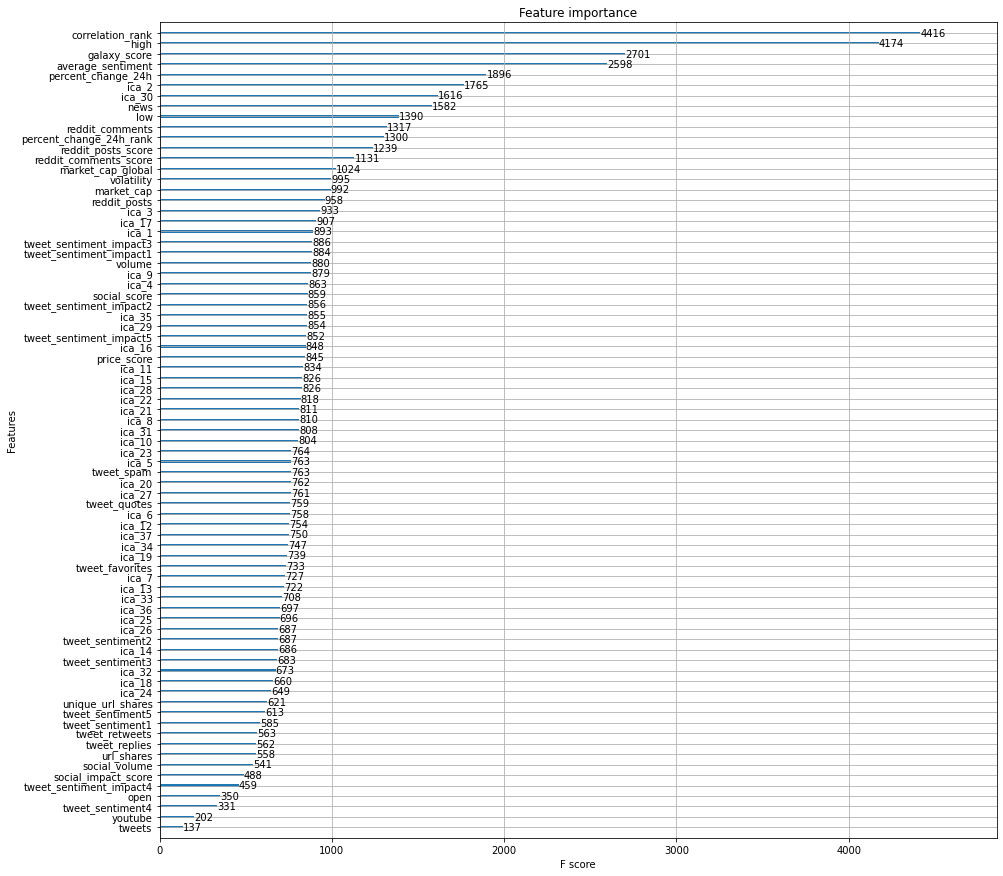

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

#print(model.feature_importances_)
# plot feature importance
fig, ax = plt.subplots(figsize=(15, 15))
plot_importance(model, ax=ax)
plt.show()

## submit

In [ ]:
from sklearn.decomposition import FastICA

test_submit = test[main_cols].copy()
print("\nStart decomposition process...")

print("ICA")
submit_ica_test = ica.transform(test_submit)

print("Append decomposition components to datasets...")
for i in range(1, N_COMP + 1):

    test_submit['ica_' + str(i)] = submit_ica_test[:, i - 1]


print('\nTrain shape: {}\nTest shape: {}'.format(X_train.shape, test_submit.shape))


Start decomposition process...
ICA
Append decomposition components to datasets...

Train shape: (11368, 80)
Test shape: (6222, 80)


In [ ]:
# Make predictions in test set and prepare submission file
predictions = model.predict(test_submit) # test[main_cols]
sub_file = ss.copy()
sub_file.close = predictions
sub_file.to_csv('Baseline.csv', index = False)

In [ ]:
sub_file.head()

,id,close
0,ID_323Sn2,0.000854
1,ID_325SNW,11350.486328
2,ID_325uzE,6315.891113
3,ID_328qCx,0.000854
4,ID_3293uJ,0.000854


In [ ]:
files.download('Baseline.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import xgboost as xgb

dmatrix = xgb.DMatrix(data=X_train, label=y_train)
params={ 'objective':'reg:squarederror',
         'max_depth': 6, 
         'colsample_bylevel':0.5,
         'learning_rate':0.5, # 0.5,
        'n_estimators':200,
        #'alpha ':2,
        'lambda ':1.5,
         'random_state':SEED}
cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=10, metrics={'rmse'}, as_pandas=True, seed=SEED)
print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())


RMSE: 160.86


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {
          'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBRegressor(seed = SEED, objective='reg:squarederror')

clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_root_mean_squared_error',
                         n_iter=25,
                         verbose=1)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

##LGBM

In [ ]:
#!pip install lightgbm
from lightgbm import LGBMRegressor
model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) # MAE: -107.906 (15.543)

MAE: -107.906 (15.543)


##catboost

In [ ]:
#!pip install catboost

In [ ]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(verbose=0, n_estimators=100)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) # MAE: -227.432 (38.044)

TypeError: ignored

In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(verbose=0, iterations=200, depth=5, learning_rate=0.365, l2_leaf_reg=1, loss_function="RMSE") # 5-193

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test, squared=False)

163.97489758483152

##SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr = SVR(C=1.0, epsilon=0.2)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
n_scores = cross_val_score(regr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -13137.179 (606.234)


##ridge

### test

In [ ]:
#ridge_rg = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
def ridge_rg(X_given, y_given=y_train):
  ridge_rg = Ridge(alpha=1, solver="auto") # 52
  #ridge_rg = make_pipeline(RobustScaler(), Ridge(alpha=1.0)) # 77
  #ridge_rg = KernelRidge(alpha=1.0)

  cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=SEED)
  n_scores = cross_val_score(ridge_rg, X_given, y_given, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
  print('RMSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

#ridge_rg(X_imp_mean,y_delete) 
#ridge_rg(X_cleaned,y_cleaned) # RMSE: -63.052 (6.967)
#ridge_rg(X_delete_cleaned,y_delete_cleaned) # RMSE: -32.634 (56.319)
#ridge_rg(X_train_cleaned,y_train_cleaned) # RMSE: -19.272 (11.371), alpha = 100 -> RMSE: -17.142 (2.080)
#ridge_rg(X_train, y_train) 
#ridge_rg(X_imputed, y_delete)
#ridge_rg(X_delete_cleaned, y_delete_cleaned)
#ridge_rg(X_delete_robust, y_delete)
#ridge_rg(X_imp_knn, y_delete)
#ridge_rg(X_reduced, y_delete)
ridge_rg(X_imp_median, y_train)

RMSE: -17.580 (2.005)


In [ ]:
#submission
ridge_rg = Ridge(alpha=1, solver="auto",random_state=SEED)

ridge_rg.fit(X_train_cleaned, y_train_cleaned) # 81
#ridge_rg.fit(X_train, y_train) # 77
#ridge_rg.fit(X_delete, y_delete) # 81
y_pred = ridge_rg.predict(X_test)

#ridge_rg.fit(X_delete_cleaned, y_delete_cleaned) # 81
#ridge_rg.fit(X_reduced, y_delete)x # 81
#y_pred = ridge_rg.predict(X_test_reduced)

#y_pred = ridge_rg.predict(X_test_imputed)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test, squared=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.61801e-27): result may not be accurate.
  overwrite_a=True).T


83.38126033859747

In [ ]:
#y_pred[y_pred<0] = 0
y_pred[(y_pred<100)] = 0

from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test, squared=False)
#X_train_cleaned.describe()

83.38057545483085

In [ ]:
y_pred[y_pred<100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
# Make predictions in test set and prepare submission file
predictions = ridge_rg.predict(test[main_cols])
sub_file = ss.copy()
sub_file.close = predictions
sub_file.to_csv('Baseline.csv', index = False)

In [ ]:
sub_file.head()

,id,close
0,ID_323Sn2,-0.929759
1,ID_325SNW,11364.683493
2,ID_325uzE,6303.025363
3,ID_328qCx,-0.333211
4,ID_3293uJ,-0.496252


In [ ]:
files.download('Baseline.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### formal

In [ ]:
#submission
ridge_rg = Ridge(alpha=10, solver="auto")


#ridge_rg = make_pipeline(StandardScaler(), Ridge(alpha=10.0)) # 77
#ridge_rg.fit(X_train_cleaned, y_train_cleaned)
#ridge_rg.fit(X_train, y_train) # 77.54780979871404
#ridge_rg.fit(X_imputed, y_train)
#ridge_rg.fit(X_delete, y_delete) # 77.58237723128258
#ridge_rg.fit(X_delete_cleaned, y_delete_cleaned) # 83.99180726695666
#ridge_rg.fit(X_delete_imputed, y_delete) # 83.99180726695666
# ridge_rg.fit(X_delete, y_delete) 

# y_pred = ridge_rg.predict(X_test)


# ridge_rg.fit(X_delete_robust, y_delete) 
# y_pred = ridge_rg.predict(X_test_robust) 222


ridge_rg.fit(X_delete_robust, y_delete) 
y_pred = ridge_rg.predict(X_test_robust) 222


from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test, squared=False)

222.34371163499102

## used on X_train instead of X_delete as above

In [ ]:
# used on X_train instead of X_delete as above

from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.datasets import make_classification

iso = IsolationForest(random_state=SEED, contamination=0.05)
y_pred = iso.fit_predict(X_train)
X_train_cleaned = X_train[np.where(y_pred == 1, True, False)]
y_train_cleaned = y_train[np.where(y_pred == 1, True, False)]

# summarize the shape of the updated training dataset
print(X_train_cleaned.shape, y_train_cleaned.shape)
cleaned,_ = X_train_cleaned.shape

total, _ = X_train.shape
print("number of outlier row removed: ", total - cleaned)
print("percentage of outliers removed: ", (total-cleaned) / total)

(9599, 47) (9599,)
number of outlier row removed:  506
percentage of outliers removed:  0.05007422068283028


### param tuning

In [ ]:
ridge_rg = Ridge()
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 4, 0.05)
# define search
search = GridSearchCV(ridge_rg, grid, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

RMSE: -52.000
Config: {'alpha': 3.95}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.48786e-27): result may not be accurate.
  overwrite_a=True).T


In [ ]:
results

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=23),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0....
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53,
       1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64,
       1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75,
       1.76, 1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86,
       1.87, 1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97,
       1.98, 1.99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_m

In [ ]:
scores = [x[1] for x in clf.grid_scores_]
scores = np.array(scores).reshape(len(Cs), len(Gammas))

for ind, i in enumerate(Cs):
    plt.plot(Gammas, scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

##Lasso reg

In [ ]:
from sklearn import linear_model
lasso_rg = linear_model.Lasso(alpha=0.1)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
n_scores = cross_val_score(lasso_rg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -88.216 (14.829)


##Elasticnet

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
n_scores = cross_val_score(elastic, X_train_cleaned, y_train_cleaned, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -34.489 (5.653)


In [ ]:
#submission
elastic = ElasticNet()
#ridge_rg = make_pipeline(StandardScaler(), Ridge(alpha=0.8))
elastic.fit(X_train_cleaned, y_train_cleaned)
#elastic.fit(X_train, y_train)

y_pred = elastic.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test, squared=False)

91.70903709500718

##RGF regression

In [ ]:
!pip install rgf_python

In [ ]:

from rgf.sklearn import RGFRegressor
rgf_rg = RGFRegressor(max_leaf=300, algorithm="RGF_Sib", test_interval=100, loss="LS")

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
n_scores = cross_val_score(rgf_rg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) # MAE: -473.728 (29.295)

MAE: -473.728 (29.295)


## linear regression

In [ ]:
# Instantiate model
lm2 = LinearRegression()
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test, squared=False)

69.88118625011259

## autosklearn

In [ ]:
#!pip install auto-sklearn

In [ ]:
import autosklearn.regression
from autosklearn.metrics import root_mean_squared_error 
n_mins = 90
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=n_mins*60,
    #include_preprocessors=["no_preprocessing"], exclude_preprocessors=None,
    exclude_estimators=["sgd", "gaussian_process", "ard_regression", "liblinear_svr"], #,
    per_run_time_limit=30,
    ensemble_size=6,
    metric=root_mean_squared_error 
#    n_jobs=4
)
automl.fit(X_delete, y_delete)
print(automl.leaderboard())
print(automl.show_models())

train_predictions = automl.predict(X_test)
#submission

from sklearn.metrics import mean_squared_error
mean_squared_error(train_predictions, y_test, squared=False)

          rank  ensemble_weight         type       cost   duration
model_id                                                          
138          1         0.666667  extra_trees  72.733075   9.529518
212          2         0.166667     adaboost  79.614408  10.006911
162          3         0.166667     adaboost  82.752278   4.703150
[(0.666667, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'feature_agglomeration', 'regressor:__choice__': 'extra_trees', 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.013555629780288401, 'feature_preprocessor:feature_agglomeration:affinity': 'euclide

75.24776710829738

In [ ]:
automl.leaderboard(detailed=True, ensemble_only=False)#.loc[228] # , top_k=8

,rank,ensemble_weight,type,cost,duration,config_id,train_loss,seed,start_time,end_time,budget,status,data_preprocessors,feature_preprocessors,balancing_strategy,config_origin
model_id,,,,,,,,,,,,,,,,
138,1,0.666667,extra_trees,7.273308e+01,9.529518,137,2.520348e+01,0,1.630304e+09,1.630304e+09,0.0,StatusType.SUCCESS,"[no_encoding, minority_coalescer, minmax]",[feature_agglomeration],None,Random Search
254,2,0.000000,random_forest,7.768864e+01,5.984977,253,3.526550e+01,0,1.630306e+09,1.630306e+09,0.0,StatusType.SUCCESS,"[encoding, minority_coalescer, robust_scaler]",[extra_trees_preproc_for_regression],None,Local Search
279,3,0.000000,random_forest,7.781746e+01,18.581241,278,4.018407e+01,0,1.630306e+09,1.630306e+09,0.0,StatusType.SUCCESS,"[one_hot_encoding, minority_coalescer, robust_...",[extra_trees_preproc_for_regression],None,Local Search
250,4,0.000000,random_forest,7.790338e+01,5.156501,249,4.289506e+01,0,1.630306e+09,1.630306e+09,0.0,StatusType.SUCCESS,"[one_hot_encoding, minority_coalescer, minmax]",[extra_trees_preproc_for_regression],None,Local Search
212,5,0.166667,adaboost,7.961441e+01,10.006911,211,2.084614e+01,0,1.630305e+09,1.630305e+09,0.0,StatusType.SUCCESS,"[encoding, no_coalescense, standardize]",[extra_trees_preproc_for_regression],None,Random Search
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,240,0.000000,mlp,7.224725e+04,1.044162,71,7.788008e+04,0,1.630303e+09,1.630303e+09,0.0,StatusType.SUCCESS,"[one_hot_encoding, minority_coalescer, standar...",[select_percentile_regression],None,Random Search
71,241,0.000000,libsvm_svr,2.025107e+08,4.539333,70,2.055586e+08,0,1.630303e+09,1.630303e+09,0.0,StatusType.SUCCESS,"[one_hot_encoding, minority_coalescer, power_t...",[extra_trees_preproc_for_regression],None,Local Search
142,242,0.000000,mlp,4.804678e+10,3.252325,141,7.504285e+10,0,1.630304e+09,1.630304e+09,0.0,StatusType.SUCCESS,"[encoding, minority_coalescer, standardize]",[polynomial],None,Random Search


In [ ]:
automl.get_models_with_weights()

[(0.6666666666666666,
  SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'feature_agglomeration', 'regressor:__choice__': 'extra_trees', 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.013555629780288401, 'feature_preprocessor:feature_agglomeration:affinity': 'euclidean', 'feature_preprocessor:feature_agglomeration:linkage': 'average', 'feature_preprocessor:feature_agglomeration:n_clusters': 361, 'feature_preprocessor:feature_agglomeration:pooling_func': 'median', 'regressor:extra_trees:bootstrap': 'False', 'regressor:extra_trees:criterion': 'friedman_mse', 'regressor:extra_trees:max_

In [ ]:
automl.cv_results_.keys()

dict_keys(['mean_test_score', 'mean_fit_time', 'params', 'rank_test_scores', 'status', 'budgets', 'param_data_preprocessing:categorical_transformer:categorical_encoding:__choice__', 'param_data_preprocessing:categorical_transformer:category_coalescence:__choice__', 'param_data_preprocessing:numerical_transformer:imputation:strategy', 'param_data_preprocessing:numerical_transformer:rescaling:__choice__', 'param_feature_preprocessor:__choice__', 'param_regressor:__choice__', 'param_data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction', 'param_data_preprocessing:numerical_transformer:rescaling:quantile_transformer:n_quantiles', 'param_data_preprocessing:numerical_transformer:rescaling:quantile_transformer:output_distribution', 'param_data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max', 'param_data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min', 'param_feature_preprocessor:extra_trees_preproc_for_regress

In [ ]:
#np.argmax(automl.cv_results_['mean_test_score'])
automl.cv_results_['mean_test_score'].argsort()[:10]#[::-1]

array([136, 252, 277, 248, 210, 243, 296, 260, 279, 288])

In [ ]:
automl.cv_results_['mean_test_score'][288]

81.58740281006695

In [ ]:
automl.cv_results_['params'][288]

{'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding',
 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer',
 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.0017722578502371359,
 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean',
 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler',
 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.7669964914816525,
 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.1445762231545981,
 'feature_preprocessor:__choice__': 'feature_agglomeration',
 'feature_preprocessor:feature_agglomeration:affinity': 'cosine',
 'feature_preprocessor:feature_agglomeration:linkage': 'average',
 'feature_preprocessor:feature_agglomeration:n_clusters': 213,
 'feature_preprocessor:feature_agglomeration:pooling_func': 'median',
 

### save result

In [ ]:
import pickle
# x = automl.show_models()
# results = autml # the classifier/regressor itself
# pickle.dump(results, open('file.pickle','wb'))
x = automl
results = automl # the classifier/regressor itself
pickle.dump(results, open('file.pickle','wb'))

##old

In [ ]:
import autosklearn.regression
from autosklearn.metrics import mean_squared_error

automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=30*60,
    per_run_time_limit=30,
    metric=mean_squared_error
)
automl.fit(X_delete, y_delete)
print(automl.leaderboard())
train_predictions = automl.predict(X_test)
#submission

from sklearn.metrics import mean_squared_error
mean_squared_error(train_predictions, y_test, squared=False)

ModuleNotFoundError: ignored

In [ ]:
print(automl.leaderboard())

In [ ]:
train_predictions = automl.predict(X_test)
#submission

from sklearn.metrics import mean_squared_error
mean_squared_error(train_predictions, y_test, squared=False)

In [ ]:
print(automl.show_models())
